We start with some imports and helper functions.

In [1]:
import keras
from keras import layers
from keras.utils.np_utils import to_categorical
from keras import initializers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol

Using Theano backend.


In [2]:
def target_function(x, y):
    if abs(x) + abs(y) <= 1:
        return 1
    return 0

In [3]:
def generate_data(N):
    x = np.random.uniform(-1.4, 1.4, (N, 2))
    y = np.array([to_categorical(target_function(a,b), num_classes=2) for (a,b) in x])
    return (x, y)

In [4]:
def plot(model, grid_x, grid_y, target_f, title):
    num_layers = len(model.layers)
    num_neurons = [model.layers[n_layer].get_weights()[0].shape[1] for n_layer in range(num_layers)]
    plotting_data = [ [np.empty( (len(grid_x), len(grid_y)) ) for neuron in range(num_neurons[n_layer])] for n_layer in range(num_layers)]

    data = np.array([[x,y] for x in grid_x for y in grid_y])

    for layer in range(num_layers):
        intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[layer].output)
        output = intermediate_layer_model.predict(data)
        num_out = 0
        for i in range(len(grid_x)):
            for j in range(len(grid_y)):
                for (n, value) in enumerate(output[num_out]):
                    plotting_data[layer][n][j, i] = value
                num_out += 1
    
    horizontal_subplots = max(num_layers, 2)
    vertical_subplots = max(num_neurons) + 1

    fig, axs = plt.subplots(vertical_subplots, horizontal_subplots)
    plt.subplots_adjust(hspace = 0.4)

    for layer_index in range(num_layers):
        for neuron_index in range(num_neurons[layer_index]):
            pcm = axs[neuron_index, layer_index].pcolormesh(grid_x, grid_y, plotting_data[layer_index][neuron_index], vmin=0, vmax=1) #, cmap=pltcol.LinearSegmentedColormap.from_list("mycmap", ['red','blue']))
            axs[neuron_index, layer_index].set_title("Layer {}, neuron {}".format(layer_index, neuron_index))

    plt.colorbar(pcm, ax=axs[:,:])

    target = np.array([[target_f(x,y) for y in grid_y] for x in grid_x])
    axs[vertical_subplots-1, 0].pcolormesh(grid_x, grid_y, target, vmin=0, vmax=1)
    axs[vertical_subplots-1, 0].set_title("Target function")

    last_layer_index = num_layers - 1
    result = np.array([[ np.argmax( [neuron_output[x,y] for neuron_output in plotting_data[last_layer_index]] ) / (len(plotting_data[last_layer_index]) - 1)
                         for y in range(len(grid_y))] for x in range(len(grid_x))])
    axs[vertical_subplots-1, last_layer_index].pcolormesh(grid_x, grid_y, result, vmin=0, vmax=1)
    axs[vertical_subplots-1, last_layer_index].set_title("argmax(layer {} output)".format(last_layer_index))

    fig.suptitle(title)


First we will take a net with 2 layers, each having 2 neurons.

In [5]:
model = keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))

In [6]:
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='mse')

Let us take weights from the example file:

In [7]:
model.layers[0].set_weights([np.array(((-0.2,0.3), (.5,-0.6))).T, np.array((0.1,-0.4))])
model.layers[1].set_weights([np.array(((-0.25,0.35), (.55,-0.65))).T, np.array((0.15,-0.45))])

Let us see how the network behaves before training. On the left, two top pictures show outputs of the neurons from the first layer -- for each point (x,y) in the square $[-2,2]^2$, we show the output value by colours from black (0) to yellow (1.0). Note that for training we use only points from a square $[-1.4, 1.4]^2$. Bottom left part shows the target function. Two top graphs on the right are the output of the neurons from the second layer (i.e., the output of the network), and right bottom picture shows predictions. In this example, every point is predicted to be in class 0 (the black one). 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

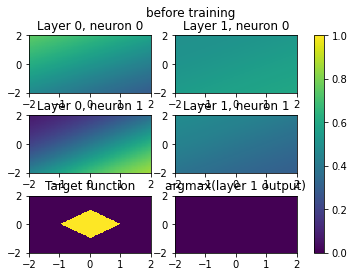

In [8]:
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "before training")

Now let us train the network.

In [9]:
x, y = generate_data(10000)
model.fit(x, y, batch_size=10, epochs=45)

Epoch 1/45
10000/10000 [==============================] - 0s 42us/step - loss: 0.1955
Epoch 2/45
10000/10000 [==============================] - 0s 43us/step - loss: 0.1938
Epoch 3/45
10000/10000 [==============================] - 0s 44us/step - loss: 0.1937
Epoch 4/45
10000/10000 [==============================] - 0s 43us/step - loss: 0.1936
Epoch 5/45
10000/10000 [==============================] - 0s 43us/step - loss: 0.1935
Epoch 6/45
10000/10000 [==============================] - 0s 43us/step - loss: 0.1933
Epoch 7/45
10000/10000 [==============================] - 0s 44us/step - loss: 0.1931
Epoch 8/45
10000/10000 [==============================] - 0s 47us/step - loss: 0.1929
Epoch 9/45
10000/10000 [==============================] - 0s 45us/step - loss: 0.1926
Epoch 10/45
10000/10000 [==============================] - 0s 44us/step - loss: 0.1922
Epoch 11/45
10000/10000 [==============================] - 0s 44us/step - loss: 0.1918
Epoch 12/45
10000/10000 [===========================

...and see how it behaves after the training. It is much better, but with only 2 neurons in the first layer, it is unable to model the square target shape.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

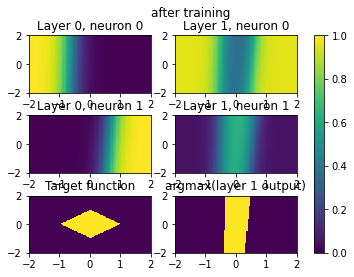

In [10]:
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "after training")

Let us try with 5 neurons in the first layer.

In [11]:
np.random.seed(2)   # should give reproducible results, at least using Theano backend
model = keras.Sequential()
model.add(layers.Dense(5, input_dim=2, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=1), bias_initializer=initializers.Zeros()))
model.add(layers.Dense(2, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=1), bias_initializer=initializers.Zeros()))
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='mse')

In [12]:
x, y = generate_data(10000)
model.fit(x, y, batch_size=10, epochs=45)

Epoch 1/45
10000/10000 [==============================] - 0s 34us/step - loss: 0.1906
Epoch 2/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1862
Epoch 3/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1824
Epoch 4/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1772
Epoch 5/45
10000/10000 [==============================] - 0s 34us/step - loss: 0.1706
Epoch 6/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1631
Epoch 7/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1557
Epoch 8/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1491
Epoch 9/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1433
Epoch 10/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1374
Epoch 11/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1303
Epoch 12/45
10000/10000 [===========================

Let us examine the behaviour of this network after training. This one can recognise the square shape quite well. Note that neuron 1 from layer 0 outputs similar values for all points.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

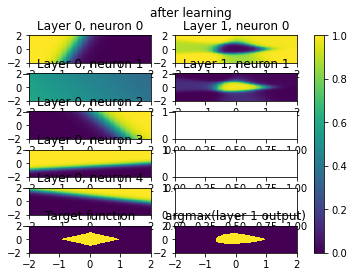

In [13]:
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "after learning")

Now let us come back to the net with just 2 neurons in each layer and initialise weights to zero:

In [14]:
model = keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='mse')
model.layers[0].set_weights([np.zeros((2,2)), np.zeros((2,))])
model.layers[1].set_weights([np.zeros((2,2)), np.zeros((2,))])

Epoch 1/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1966
Epoch 2/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 3/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 4/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1936
Epoch 5/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 6/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1936
Epoch 7/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 8/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 9/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1936
Epoch 10/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.1936
Epoch 11/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.1936
Epoch 12/45
10000/10000 [===========================

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

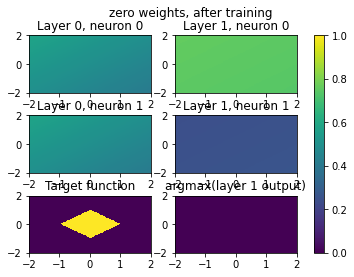

In [15]:
x, y = generate_data(10000)
model.fit(x, y, batch_size=10, epochs=45)
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "zero weights, after training")

As one can see above, the network performs very poorly. Examining the weights reveals the reason for that: when initial weights are all the same (within a hidden layer), by symmetry, the neurons in that layer evolve in the same way. As a result, it is like we had only 1 neuron in that layer and this leads to poor performance.

In [16]:
model.get_weights()   # compare columns of the first array

[array([[-0.08791123, -0.08791123],
        [ 0.08488268,  0.08488268]], dtype=float32),
 array([-0.02046185, -0.02046185], dtype=float32),
 array([[ 0.3661374 , -0.36613744],
        [ 0.3661374 , -0.36613744]], dtype=float32),
 array([ 0.7271915, -0.7271915], dtype=float32)]

On the other hand, if the weights are too large (with respect to the number of inputs), then the neurons saturate and the training is very slow. Let us see such an example, you may see weight $-117.57395$ (at least if the seed gives reproducible results).

[[-117.57395    28.345278]
 [ -90.79815    52.419914]]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

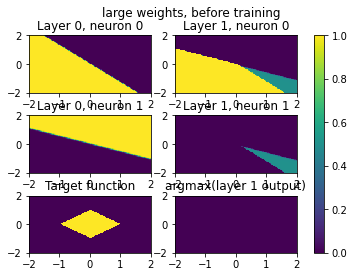

In [17]:
np.random.seed(2)   # should give reproducible results, at least using Theano backend
model = keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=100), bias_initializer=initializers.Zeros()))
model.add(layers.Dense(2, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=100), bias_initializer=initializers.Zeros()))
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='mse')
print(model.layers[0].get_weights()[0])
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "large weights, before training")

Let us train the network.

In [18]:
x, y = generate_data(10000)
model.fit(x, y, batch_size=10, epochs=45)

Epoch 1/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3837
Epoch 2/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3793
Epoch 3/45
10000/10000 [==============================] - 0s 31us/step - loss: 0.3776
Epoch 4/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.3767
Epoch 5/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.3763
Epoch 6/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3760
Epoch 7/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3758
Epoch 8/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3756
Epoch 9/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3756
Epoch 10/45
10000/10000 [==============================] - 0s 33us/step - loss: 0.3755
Epoch 11/45
10000/10000 [==============================] - 0s 32us/step - loss: 0.3754
Epoch 12/45
10000/10000 [===========================

Let us examine the same weights again, after training. The weight that had value $−117.57395$ now has a value $-117.63838$. The other weights are also almost the same. The network virtually stays unchanged despite training.

In [19]:
print(model.layers[0].get_weights()[0])

[[-117.63838    28.087534]
 [ -90.73178    52.597485]]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'n

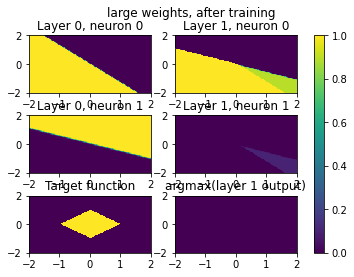

In [20]:
plot(model, np.linspace(-2,2,100), np.linspace(-2,2,100), target_function, "large weights, after training")